## Building a Credit Scoring Model for Buy-Now-Pay-Later Services: A Comprehensive Analysis of Credit Risk Classification

## Overview
Credit scoring models are vital tools used by financial institutions to assess the creditworthiness of potential borrowers. As part of risk management, these models predict the likelihood of a borrower defaulting on a loan, which allows institutions to mitigate potential losses. Traditionally, credit scoring models rely on statistical methods to analyze historical data, identifying patterns and relationships between borrower behavior and loan outcomes.

In this challenge, we aim to build a comprehensive credit scoring model for Bati Bank, a leading financial institution collaborating with an eCommerce platform. The goal is to enhance their buy-now-pay-later service, allowing customers to purchase items on credit, based on their predicted creditworthiness. By developing a reliable and robust credit scoring model, Bati Bank can make informed lending decisions while minimizing the risk of defaults. This project involves data exploration, feature engineering, model development, and real-time deployment of the model via an API to assess credit risk and optimize loan terms.

## Objectives
The primary objectives of this project are as follows:

1. Define Credit Risk Proxy: Establish a proxy variable to categorize users as high-risk (bad) or low-risk (good) based on their likelihood of default.

2. Feature Engineering: Select relevant features from the data and engineer new ones that are strong predictors of default risk. This includes creating aggregate and extracted features, encoding categorical variables, handling missing data, and normalizing numerical features.

3. Develop a Credit Risk Model: Build and train machine learning models that assign risk probabilities to new customers based on historical transaction data.

4. Credit Scoring: Use the model's probability estimates to create a credit score for each customer, facilitating quick and accurate creditworthiness assessments.

5. Loan Optimization: Predict the optimal loan amount and duration for new customers, considering their risk profile to ensure sustainable lending practices.

6. Model Deployment: Deploy the trained credit scoring model through an API, enabling real-time credit scoring and decision-making. The API will accept customer transaction data and return predictions on credit risk and loan recommendations.

### Import Library

In [28]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [29]:
df = pd.read_csv('../data/woe_feature_engineering.csv')
df

,Unnamed: 0,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,Amount,...,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,Frequency,Monetary,Stability,RFMS_Score,Risk_Label,RFMS_Binned
0,0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,0.0,5,1,0.092004,...,False,True,False,1.0,0.028851,0.557522,0.000919,0.396823,0,2.0
1,1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,0.0,3,19,0.091910,...,True,False,False,1.0,0.028851,0.557522,0.000919,0.396823,0,2.0
2,2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,0.0,5,0,0.091958,...,False,True,False,0.0,0.000244,0.556944,0.000000,0.139297,0,0.0
3,3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0.0,0,11,0.093750,...,False,True,False,1.0,0.009046,0.558153,0.005187,0.393097,0,2.0
4,4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,0.0,3,19,0.091853,...,True,False,False,1.0,0.009046,0.558153,0.005187,0.393097,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,0.0,3,19,0.091820,...,True,False,False,1.0,0.139853,0.569883,0.006814,0.429138,0,2.0
95658,95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,0.0,5,1,0.092004,...,False,True,False,1.0,0.010269,0.557249,0.000687,0.392051,0,2.0
95659,95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,0.0,3,19,0.091910,...,True,False,False,1.0,0.010269,0.557249,0.000687,0.392051,0,2.0
95660,95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,0.0,5,8,0.092188,...,False,True,False,1.0,0.127873,0.561462,0.000969,0.422576,0,2.0


## 5. Train Test Split

### Separet dependant and independant variable

In [30]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(['TransactionId', 'Risk_Label', 'RFMS_Score', 'TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CountryCode', 'ProviderId','ProductId','FraudResult'], axis=1)  # Drop non-feature columns
y = df['Risk_Label']
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check shapes before SMOTE
print("Before SMOTE:")
print("X shape:", X.shape)
print("y shape:", y.shape)
# Verify sizes of resampled data
print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)

Before SMOTE:
X shape: (95662, 28)
y shape: (95662,)
X_resampled shape: (174848, 28)
y_resampled shape: (174848,)


### Split the data to training and Testing Set

In [31]:
# Split the data into training and testing sets
from sklearn.preprocessing import StandardScaler
# Train-test split using the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Features (X):")
X.head()

Features (X):


,Unnamed: 0,Amount,Value,PricingStrategy,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Total_Transaction_Amount,Average_Transaction_Amount,...,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,Frequency,Monetary,Stability,RFMS_Binned
0,0,0.092004,0.000101,0.666667,2,15,11,2018,0.557522,0.047184,...,False,False,False,True,False,1.0,0.028851,0.557522,0.000919,2.0
1,1,0.091910,0.000002,0.666667,2,15,11,2018,0.557522,0.047184,...,False,False,True,False,False,1.0,0.028851,0.557522,0.000919,2.0
2,2,0.091958,0.000050,0.666667,2,15,11,2018,0.556944,0.047137,...,False,False,False,True,False,0.0,0.000244,0.556944,0.000000,0.0
3,3,0.093750,0.002206,0.666667,3,15,11,2018,0.558153,0.047749,...,False,True,False,True,False,1.0,0.009046,0.558153,0.005187,2.0
4,4,0.091853,0.000065,0.666667,3,15,11,2018,0.558153,0.047749,...,False,False,True,False,False,1.0,0.009046,0.558153,0.005187,2.0


In [32]:
X.columns

Index(['Unnamed: 0', 'Amount', 'Value', 'PricingStrategy', 'Transaction_Hour',
       'Transaction_Day', 'Transaction_Month', 'Transaction_Year',
       'Total_Transaction_Amount', 'Average_Transaction_Amount',
       'Transaction_Count', 'Std_Deviation_Transaction_Amount',
       'ProductCategory_data_bundles', 'ProductCategory_financial_services',
       'ProductCategory_movies', 'ProductCategory_other',
       'ProductCategory_ticket', 'ProductCategory_transport',
       'ProductCategory_tv', 'ProductCategory_utility_bill',
       'ChannelId_ChannelId_2', 'ChannelId_ChannelId_3',
       'ChannelId_ChannelId_5', 'Recency', 'Frequency', 'Monetary',
       'Stability', 'RFMS_Binned'],
      dtype='object')

In [33]:
print("\nTarget (y):")
y.head()


Target (y):


0    0
1    0
2    0
3    0
4    0
Name: Risk_Label, dtype: int64

In [34]:
# # Display the size of the train and test sets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 139878 samples
Testing set size: 34970 samples


## 6. Model Training
The following classfication model were selected to build credit score reisk classfication

**A. Logistic Regression**

In [35]:
from sklearn.linear_model import LogisticRegression
# Initialize models
log_reg = LogisticRegression(max_iter=1000)

In [36]:
# Train Logistic Regression
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [37]:
# Make predictions
log_reg_preds_test = log_reg.predict(X_test)
log_reg_preds_train = log_reg.predict(X_train)

# Get predicted probabilities for the positive class (class 1)
log_reg_proba_train = log_reg.predict_proba(X_train)[:, 1]  # Probabilities for class 1
log_reg_proba_test = log_reg.predict_proba(X_test)[:, 1]    # Probabilities for class 1


**B. Random Forest**

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [39]:
# Train Random Forest
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
# Make predictions
rf_preds_train = rf_model.predict(X_train)
rf_preds_test = rf_model.predict(X_test)
# Get predicted probabilities for the positive class (class 1)
rf_proba_train = rf_model.predict_proba(X_train)[:, 1]  # Probabilities for class 1
rf_proba_test = rf_model.predict_proba(X_test)[:, 1]    # Probabilities for class 1


**C.  XGBoost Classfication Model**

In [41]:
# XGBoost model
import xgboost as xgb
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)

In [42]:
#  Train the XGBoost model 
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [43]:
# Make predictions
xgb_train_pred = xgb_model.predict(X_train)
xgb_test_pred = xgb_model.predict(X_test)
# Get predicted probabilities for the positive class (class 1)
xgb_proba_train = xgb_model.predict_proba(X_train)[:, 1]  # Probabilities for class 1
xgb_proba_test = xgb_model.predict_proba(X_test)[:, 1]    # Probabilities for class 1


**D. Adaboost**

In [44]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()

In [45]:
# Adaboost
ada_model.fit(X_train, y_train)

c:\Users\getac\anaconda3\envs\myenve\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [46]:
# AdaBoost predictions
ada_preds_train = ada_model.predict(X_train)
ada_preds_test = ada_model.predict(X_test)
# Get predicted probabilities for the positive class (class 1)
ada_proba_train = ada_model.predict_proba(X_train)[:, 1]  # Probabilities for class 1
ada_proba_test = ada_model.predict_proba(X_test)[:, 1]    # Probabilities for class 1


**E. Decision Tree**

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [48]:
#decision tree
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
# Decision Tree predictions
dt_preds_train = dt_model.predict(X_train)
dt_preds_test = dt_model.predict(X_test)
# Get predicted probabilities for the positive class (class 1)
dt_proba_train = dt_model.predict_proba(X_train)[:, 1]  # Probabilities for class 1
dt_proba_test = dt_model.predict_proba(X_test)[:, 1]

### Performance Evaluation

Logistic Regression Evaluation on Training Set:
Logistic Regression (Train) Performance:
Accuracy: 0.9999
Precision: 0.9997
Recall: 1.0000
F1 Score: 0.9999
ROC-AUC: 0.9999
Confusion Matrix:
[[69987    18]
 [    0 69873]]

Confusion Matrix:
[[69987    18]
 [    0 69873]]



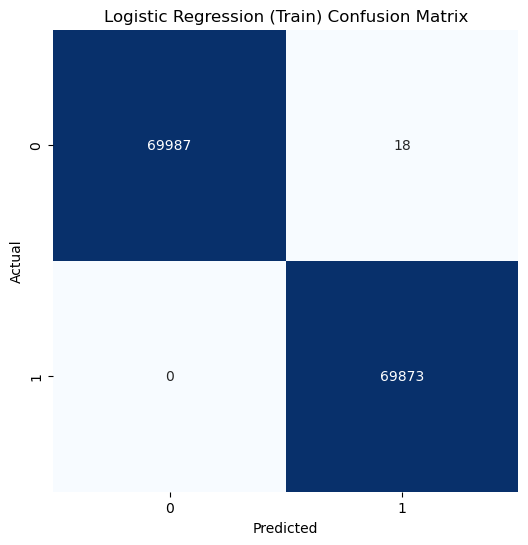

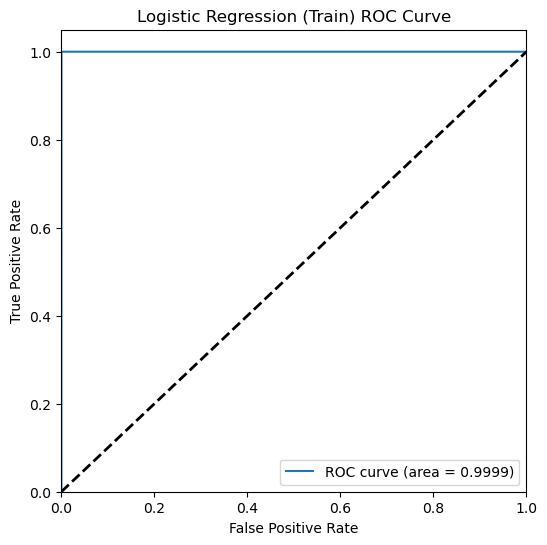

Logistic Regression Evaluation on Testing Set:
Logistic Regression (Test) Performance:
Accuracy: 0.9998
Precision: 0.9996
Recall: 1.0000
F1 Score: 0.9998
ROC-AUC: 0.9998
Confusion Matrix:
[[17412     7]
 [    0 17551]]

Confusion Matrix:
[[17412     7]
 [    0 17551]]



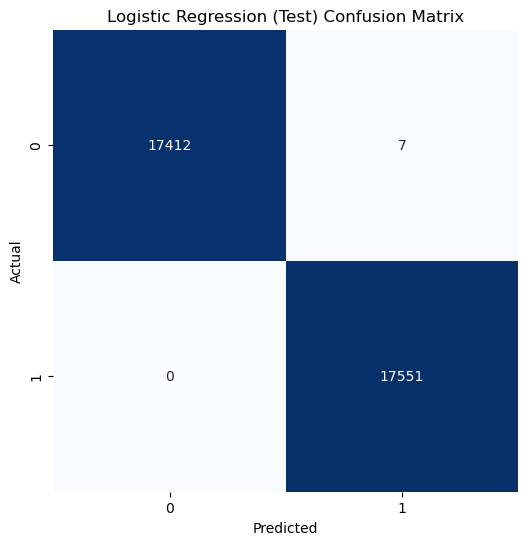

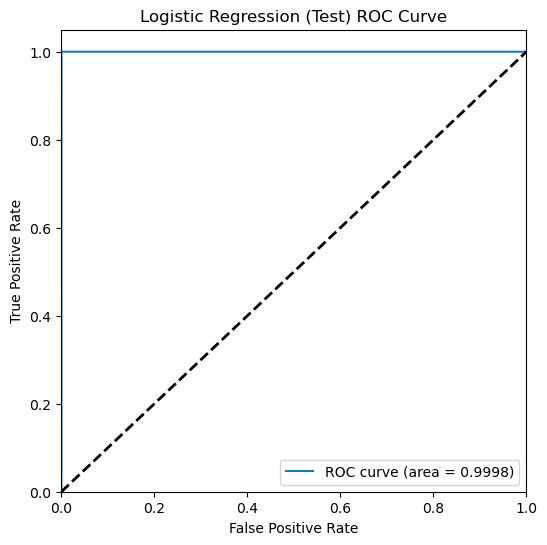

In [50]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
    auc,
)

# Define a function to evaluate the model performance
def evaluate_model(y_true, y_preds, y_proba, model_name):
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    roc_auc = roc_auc_score(y_true, y_preds)

    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_preds)}\n")
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_preds)
    print(f"Confusion Matrix:\n{cm}\n")
    # Plot confusion matrix
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{model_name} Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"{model_name} ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

# Evaluate Logistic Regression on training and testing sets
print("Logistic Regression Evaluation on Training Set:")
evaluate_model(y_train, log_reg_preds_train, log_reg_proba_train,"Logistic Regression (Train)")
print("Logistic Regression Evaluation on Testing Set:")
evaluate_model(y_test, log_reg_preds_test,log_reg_proba_test, "Logistic Regression (Test)")


Random Forest Evaluation on Training Set:
Random Forest (Train) Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000
Confusion Matrix:
[[70005     0]
 [    0 69873]]

Confusion Matrix:
[[70005     0]
 [    0 69873]]



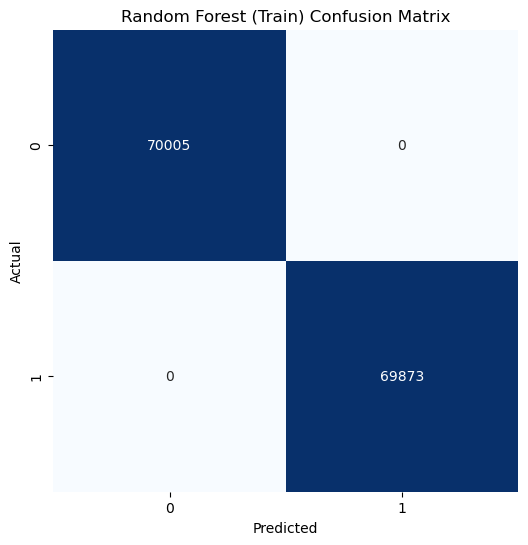

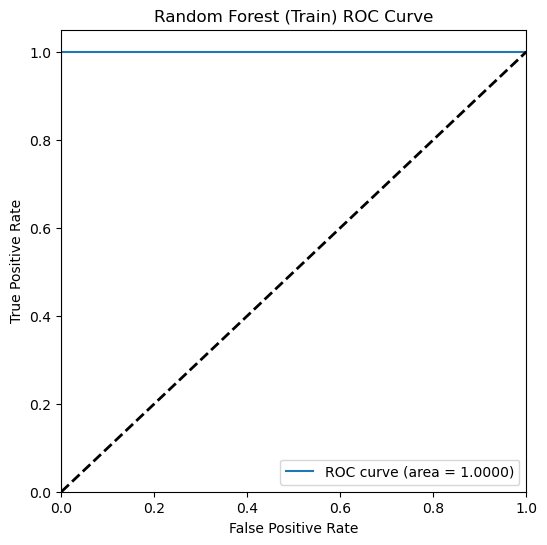

Random Forest Evaluation on Testing Set:
Random Forest (Test) Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000
Confusion Matrix:
[[17419     0]
 [    0 17551]]

Confusion Matrix:
[[17419     0]
 [    0 17551]]



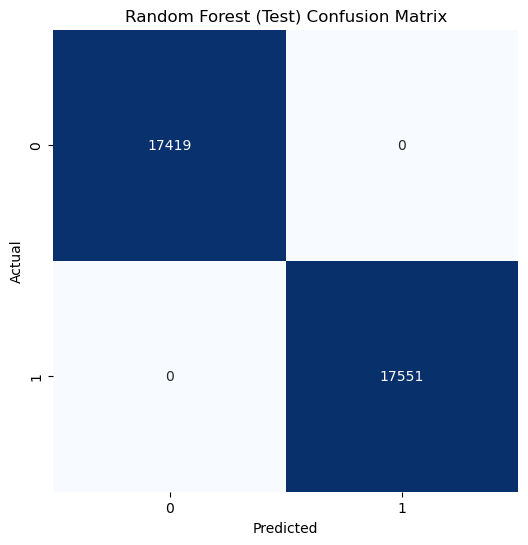

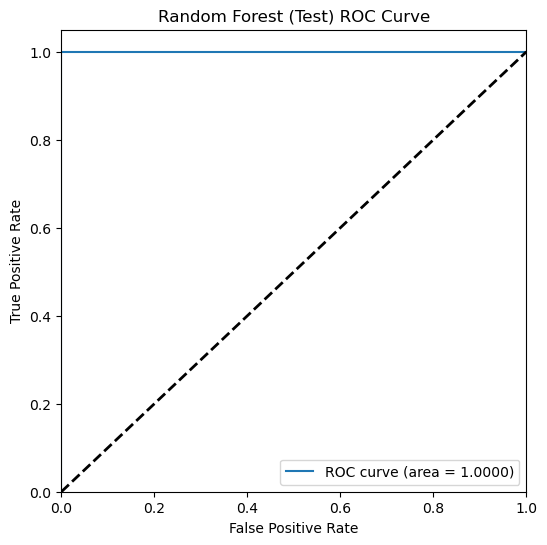

In [51]:
# Evaluate Random Forest on training and testing sets
print("Random Forest Evaluation on Training Set:")
evaluate_model(y_train, rf_preds_train, rf_proba_train, "Random Forest (Train)")
print("Random Forest Evaluation on Testing Set:")
evaluate_model(y_test, rf_preds_test, rf_proba_test, "Random Forest (Test)")

XGBoost Evaluation on Training Set:
Xgboost (Train) Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000
Confusion Matrix:
[[70005     0]
 [    0 69873]]

Confusion Matrix:
[[70005     0]
 [    0 69873]]



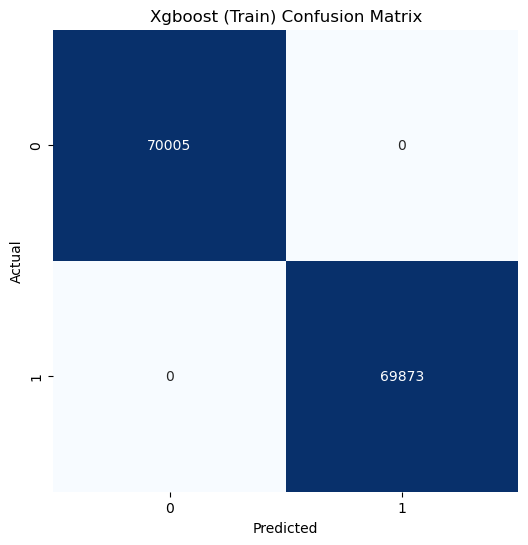

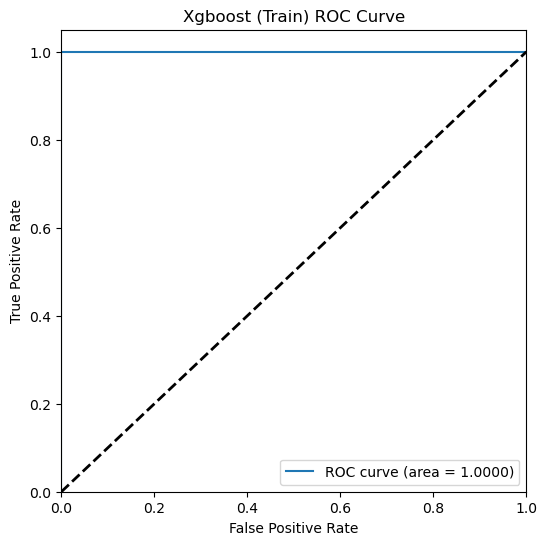

XGboost Evaluation on Testing Set:
XGBoost (Test) Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000
Confusion Matrix:
[[17419     0]
 [    0 17551]]

Confusion Matrix:
[[17419     0]
 [    0 17551]]



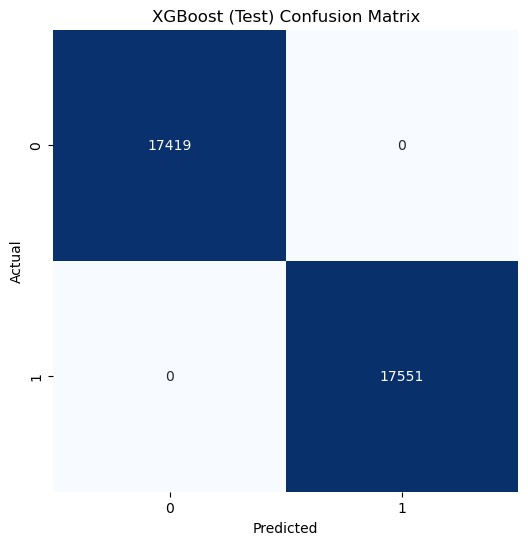

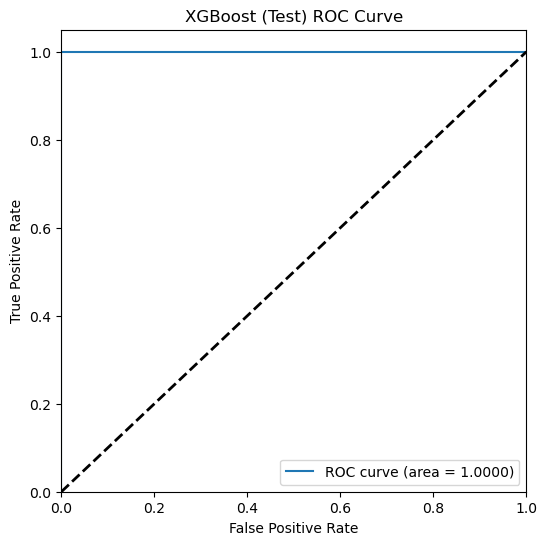

In [52]:
# Evaluate XGBoost on training and testing sets
print("XGBoost Evaluation on Training Set:")
evaluate_model(y_train, xgb_train_pred, xgb_proba_train, "Xgboost (Train)")
print("XGboost Evaluation on Testing Set:")
evaluate_model(y_test, xgb_test_pred, xgb_proba_test, "XGBoost (Test)")

Decision Tree Evaluation on Training Set:
Decision Tree (Train) Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000
Confusion Matrix:
[[70005     0]
 [    0 69873]]

Confusion Matrix:
[[70005     0]
 [    0 69873]]



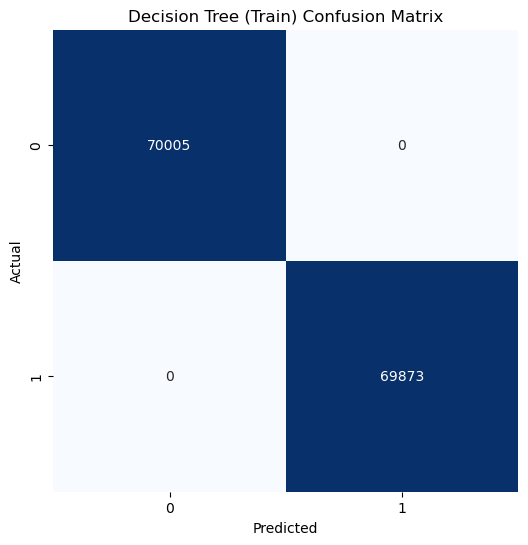

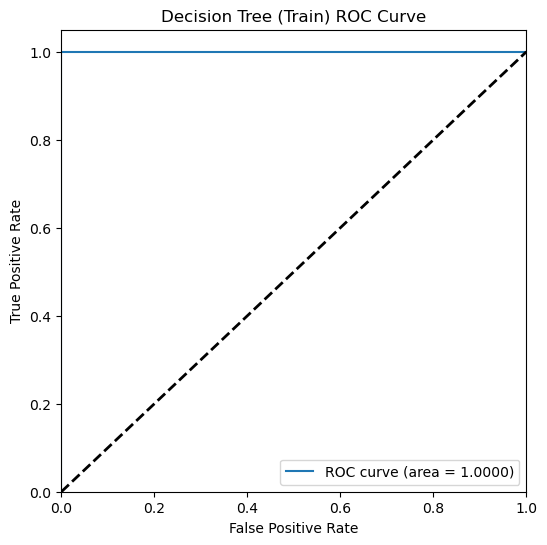

Decision Tree Evaluation on Testing Set:
Decision Tree (Test) Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000
Confusion Matrix:
[[17419     0]
 [    0 17551]]

Confusion Matrix:
[[17419     0]
 [    0 17551]]



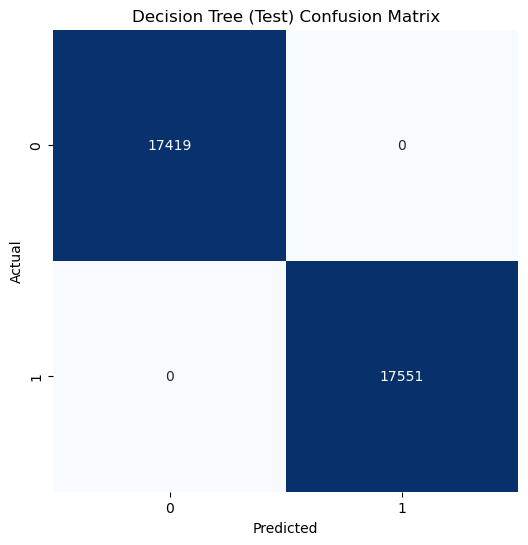

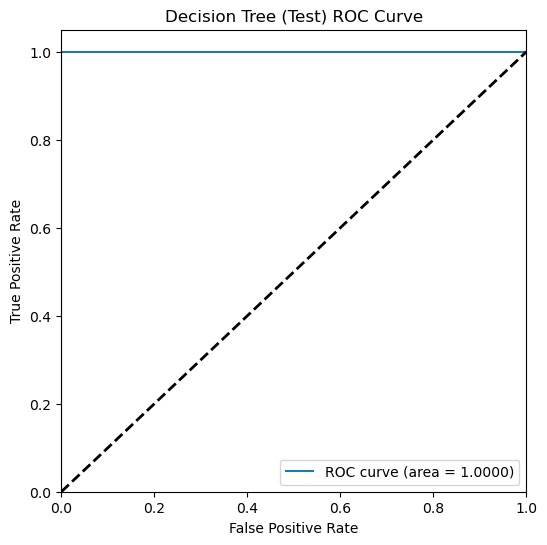

In [53]:
# Decision Tree evaluation
print("Decision Tree Evaluation on Training Set:")
evaluate_model(y_train, dt_preds_train,dt_proba_train, "Decision Tree (Train)")
print("Decision Tree Evaluation on Testing Set:")
evaluate_model(y_test, dt_preds_test,dt_proba_test, "Decision Tree (Test)")

AdaBoost Evaluation on Training Set:
AdaBoost (Train) Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000
Confusion Matrix:
[[70005     0]
 [    0 69873]]

Confusion Matrix:
[[70005     0]
 [    0 69873]]



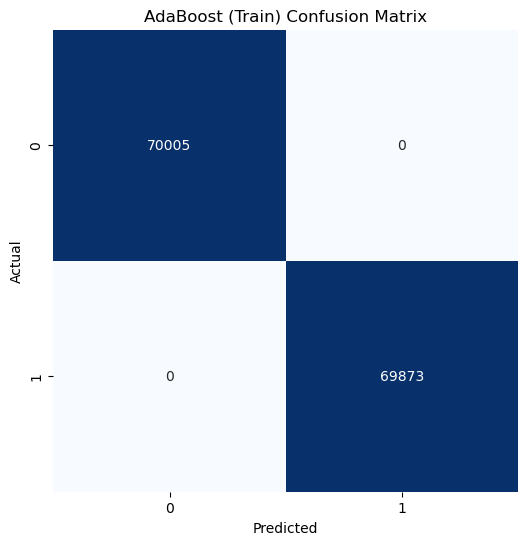

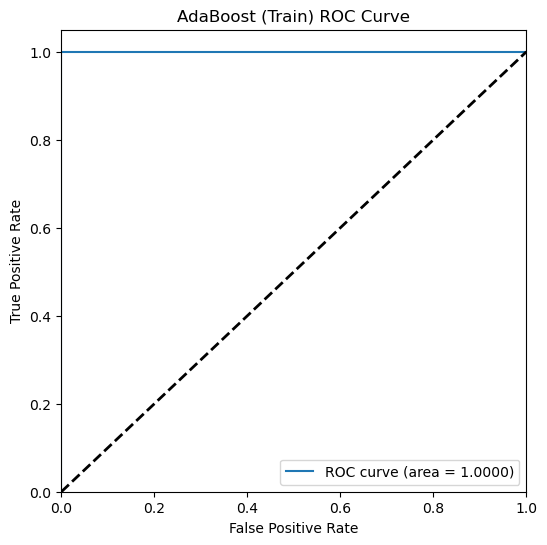

AdaBoost Evaluation on Testing Set:
AdaBoost (Test) Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000
Confusion Matrix:
[[17419     0]
 [    0 17551]]

Confusion Matrix:
[[17419     0]
 [    0 17551]]



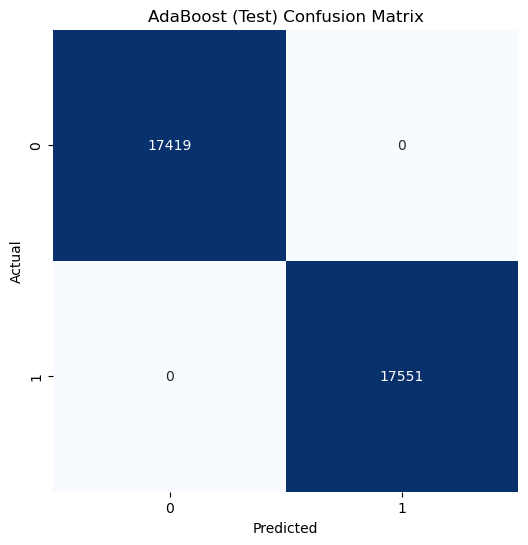

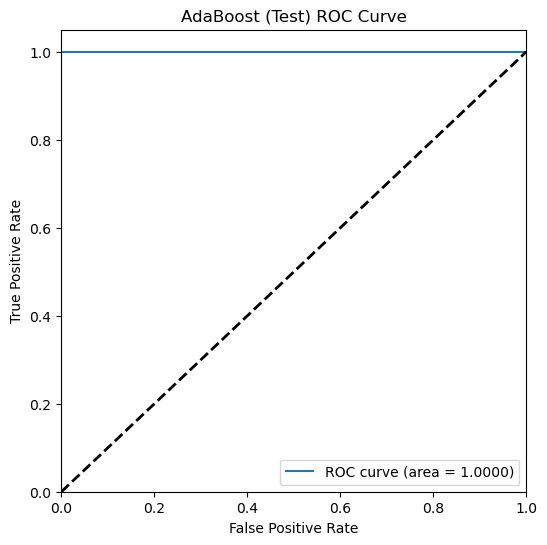

In [55]:
# AdaBoost evaluation
print("AdaBoost Evaluation on Training Set:")
evaluate_model(y_train, ada_preds_train,ada_proba_train, "AdaBoost (Train)")
print("AdaBoost Evaluation on Testing Set:")
evaluate_model(y_test, ada_preds_test, ada_proba_test,"AdaBoost (Test)")

In [59]:
import joblib
# Save the models to .pkl files
joblib.dump(log_reg, 'model/logistic_regression_model.pkl')
joblib.dump(rf_model, 'model/random_forest_model.pkl')
joblib.dump(dt_model, 'model/decision_tree_model.pkl')
joblib.dump(ada_model, 'model/adaboost_model.pkl')

print("Models saved as .pkl files.")

Models saved as .pkl files.
